In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as ks
import tensorflow as tf
from scipy.stats import zscore
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# Load the California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explore the features of the dataset
df.describe()  # Descriptive statistics of the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.isna().sum() #No null values present

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

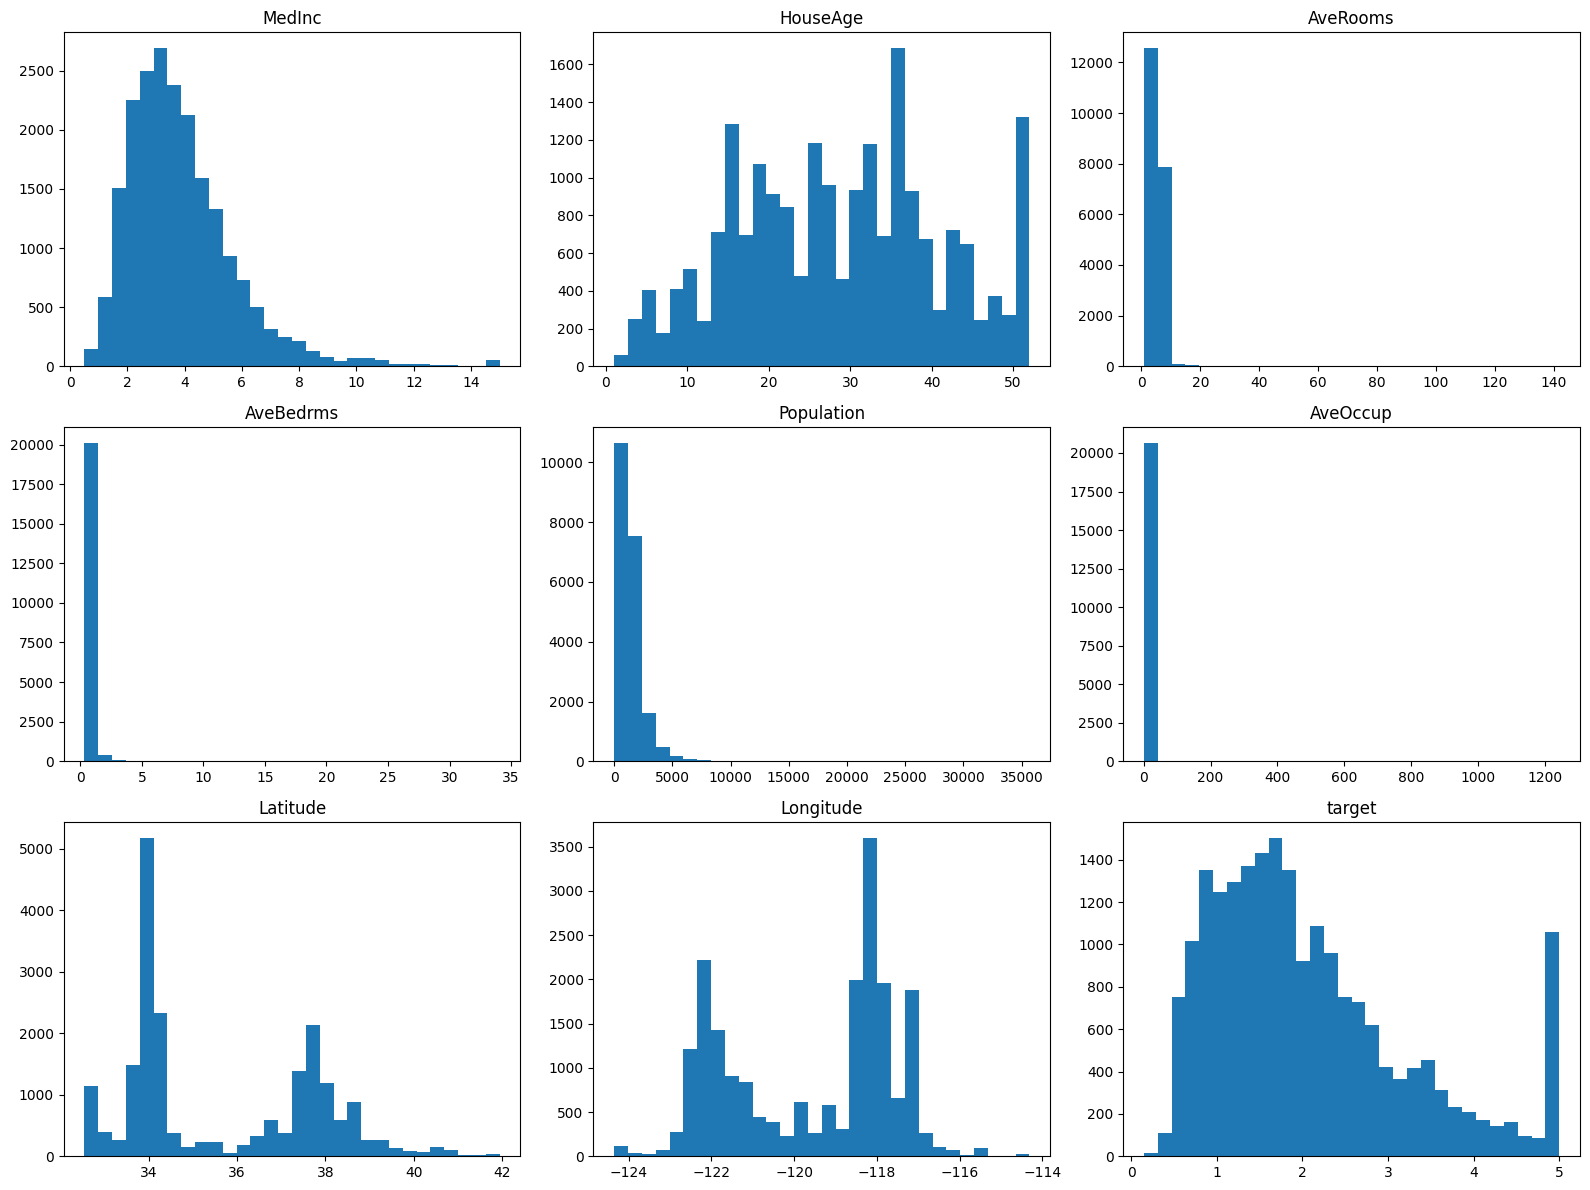

In [ ]:
#Visualizing the features using histogram to observe the data distribution
df.hist(bins=30, figsize=(16, 12), grid=False)
plt.tight_layout()
plt.show()

In [ ]:
# Identify and remove outliers using z-scores
z_scores = np.abs(zscore(df))
threshold = 3
filtered_df = df[(z_scores < threshold).all(axis=1)]

# Display information after removing outliers
print("Original Shape:", df.shape)
print("Shape after removing outliers:", filtered_df.shape)

Original Shape: (20640, 9)
Shape after removing outliers: (19794, 9)


In [ ]:
# Split dataset into train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

NameError: ignored

In [ ]:
# Split train dataset into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [ ]:
#Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

Building a Linear Regression Model

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_sc,y_train)
y_linear_pred = linear_model.predict(X_test_sc)

mae_linear = mean_absolute_error(y_test, y_linear_pred)
mse_linear =  mean_squared_error(y_test,y_linear_pred)
r2_linear = r2_score(y_test, y_linear_pred)

#Evaluating the linear models performance
print("MAE", mae_linear)
print("MSE:", mse_linear)
print("R2 Score:", r2_linear)

NameError: ignored

Building and Evaluation ANN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

#Specify 2 hidden layers with relu activation function
Layers = [
    Dense(units=30, activation="relu", input_shape=X_train_sc.shape[1:]),
    Dense(units=15, activation="relu", name='HiddenLayer1'),
    Dense(units=7, activation="relu", name='HiddenLayer2'),
    Dense(units=1)
]

ann = Sequential(Layers)
ann.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 30)                270       
                                                                 
 HiddenLayer1 (Dense)        (None, 15)                465       
                                                                 
 HiddenLayer2 (Dense)        (None, 7)                 112       
                                                                 
 dense_23 (Dense)            (None, 1)                 8         
                                                                 
Total params: 855 (3.34 KB)
Trainable params: 855 (3.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ANN Model Architecture Plot

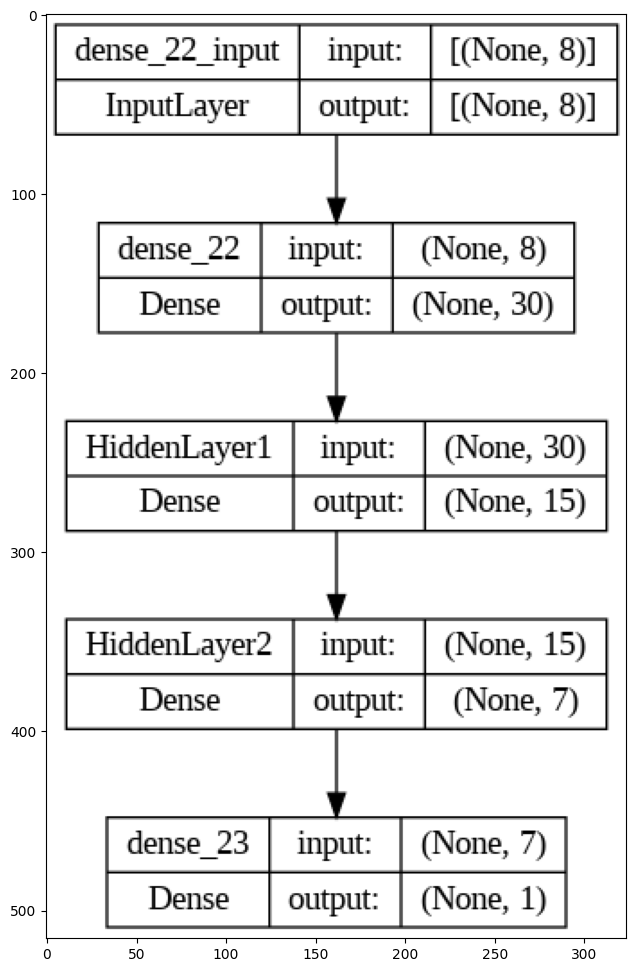

In [ ]:
tf.keras.utils.plot_model(ann, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

plt.figure(figsize=(12, 12))
img = plt.imread('model_architecture.png')
plt.imshow(img)
plt.show()

In [ ]:
# Set the loss function and optimizer for the Artificial Neural Network (ANN) model
LOSS = "mse"
OPTIMIZER = "sgd"

ann.compile(optimizer=OPTIMIZER, loss=LOSS)

In [ ]:
EPOCHS = 30
history = ann.fit(X_train_sc, y_train, epochs=EPOCHS, validation_data=(X_val_sc, y_val))
history

Epoch 1/30
372/372 [==============================] - 2s 4ms/step - loss: 0.7774 - val_loss: 0.4049
Epoch 2/30
372/372 [==============================] - 1s 4ms/step - loss: 0.3788 - val_loss: 0.3736
Epoch 3/30
372/372 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 0.3583
Epoch 4/30
372/372 [==============================] - 1s 3ms/step - loss: 0.3482 - val_loss: 0.3515
Epoch 5/30
372/372 [==============================] - 1s 3ms/step - loss: 0.3394 - val_loss: 0.3510
Epoch 6/30
372/372 [==============================] - 1s 3ms/step - loss: 0.3354 - val_loss: 0.3424
Epoch 7/30
372/372 [==============================] - 1s 3ms/step - loss: 0.3311 - val_loss: 0.3426
Epoch 8/30
372/372 [==============================] - 1s 3ms/step - loss: 0.3275 - val_loss: 0.3446
Epoch 9/30
372/372 [==============================] - 1s 3ms/step - loss: 0.3256 - val_loss: 0.4625
Epoch 10/30
372/372 [==============================] - 1s 3ms/step - loss: 0.3239 - val_loss: 0.3413

155/155 [==============================] - 0s 2ms/step - loss: 66595.4766


<Axes: >

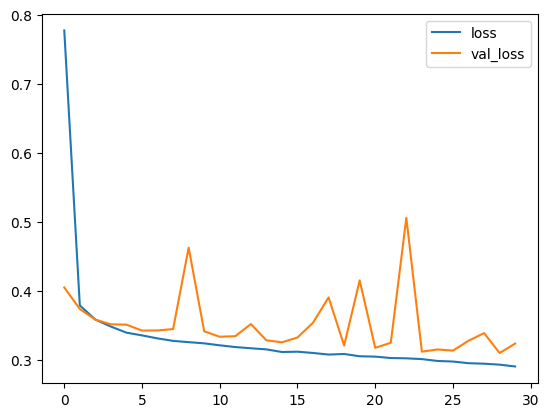

In [ ]:
ann.evaluate(X_test,y_test)
pd.DataFrame(history.history).plot()

In [ ]:
y_pred_ann = ann.predict(X_test_sc) #Making predictions using the trained ANN model

mse_ann = mean_squared_error(y_pred_ann,y_test)
r2_ann = r2_score(y_pred_ann,y_test)

155/155 [==============================] - 0s 2ms/step


In [ ]:
print("Linear Regression Model Mean Squared Error:", mse_linear )
print("Linear Regression Model R2 Score:", r2_linear)
print("ANN Model Mean Squared Error:", mse_ann)
print("ANN Model R2 Score:", r2_ann)

Linear Regression Model Mean Squared Error: 0.4769504704724777
Linear Regression Model R2 Score: 0.6090818479799152
ANN Model Mean Squared Error: 0.3259851011640479
ANN Model R2 Score: 0.595020553043876


ANN Model with lower MSE, indicats better accuracy in predicting values compared to Linear Regression.

In terms of R2 Score, Linear Regression Model has a slightly higher score compared to ANN Model, indicating a slightly better explanation of the variance in the data.

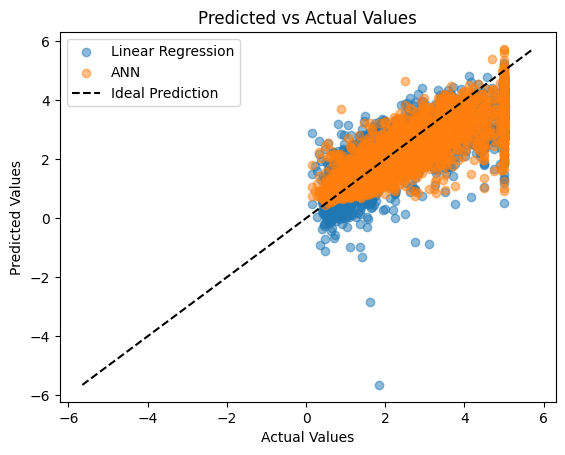

In [ ]:
# Scatter plot for Linear Regression
plt.scatter(y_test, y_linear_pred, label='Linear Regression', alpha=0.5)
# Scatter plot for ANN
plt.scatter(y_test, y_pred_ann, label='ANN', alpha=0.5)

# Line of equality (y=x) for reference
min_val = min(np.min(y_test), np.min(y_linear_pred), np.min(y_pred_ann))
max_val = max(np.max(y_test), np.max(y_linear_pred), np.max(y_pred_ann))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Ideal Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Predicted vs Actual Values')
plt.show()